In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print(f"x_train:{x_train.shape},x_test:{x_test.shape},y_train:{y_train.shape},y_test:{y_test.shape}")

x_train:(60000, 28, 28),x_test:(10000, 28, 28),y_train:(60000,),y_test:(10000,)


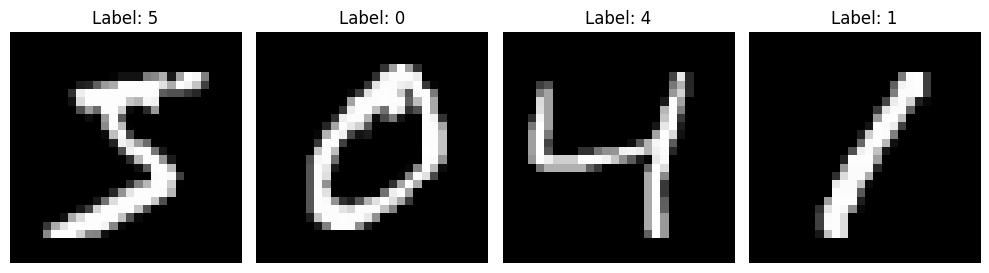

In [4]:
# Print 4 images in a row
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D

# reshaping input values (28,28) is for image height and width,1 is for gray scale images and 
# -1 is for python to decide the batch size here for training data it will be 60000
# it is necessary for a CNN to have a 4D vector as input
x_train=x_train.reshape(-1,28,28,1).astype("float32")/255
x_test=x_test.reshape(-1,28,28,1).astype("float32")/255

In [6]:
print(f"shape of x_train:{x_train.shape},x_test:{x_test.shape}")

shape of x_train:(60000, 28, 28, 1),x_test:(10000, 28, 28, 1)


In [7]:
# define the model
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# train and save model
model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))
model.save("digits.h5")

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9070 - loss: 0.3135 - val_accuracy: 0.9805 - val_loss: 0.0633
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9852 - loss: 0.0529 - val_accuracy: 0.9839 - val_loss: 0.0477
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9912 - loss: 0.0306 - val_accuracy: 0.9839 - val_loss: 0.0468
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9862 - val_loss: 0.0430
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.9864 - val_loss: 0.0461
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9973 - loss: 0.0085 - val_accuracy: 0.9849 - val_loss: 0.0512
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9974 - loss: 0.0070 - val_accuracy: 0.9872 - val_loss: 0.0487
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9984 - loss: 0

# Sample Prediction

In [11]:
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image

# Load saved model
model = load_model("digits.h5")
# Load and convert to grayscale
img = Image.open("7.png").convert("L")  # 'L' = grayscale

# Resize to 28x28 if not already
img = img.resize((28, 28))

# Convert to NumPy array and normalize
img_array = np.array(img).astype("float32") / 255.0

# Invert colors if background is black (MNIST digits are white on black)
img_array = 1 - img_array

# Reshape to (1, 28, 28, 1) for prediction
img_array = img_array.reshape(1, 28, 28, 1)

pred = model.predict(img_array)
predicted_class = np.argmax(pred)

print("Predicted digit:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted digit: 2
